In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

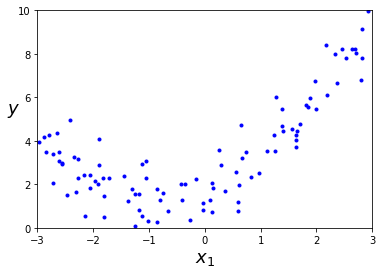

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [3]:
import pandas as pd
pd.DataFrame({'Distance': X.flatten(), 'Time': y.flatten()})

,Distance,Time
0,-0.752759,1.617611
1,2.704286,8.061859
2,1.391964,4.452506
3,0.591951,0.779585
4,-2.063888,1.846257
...,...,...
95,-0.037226,1.147656
96,0.136397,2.068597
97,-0.434754,2.000904
98,-2.847485,3.483292


In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
display(X[0])
display(X_poly[0])

array([-0.75275929])

array([-0.75275929,  0.56664654])

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

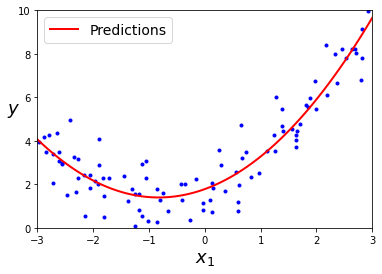

In [6]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

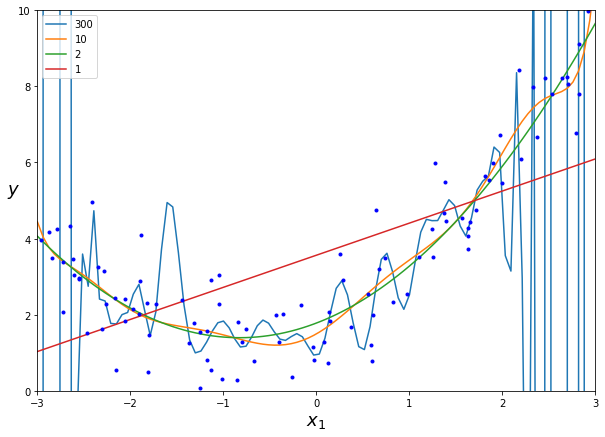

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_new = np.linspace(-3, 3, 100).reshape(100, 1)

plt.figure(figsize=(10, 7))
for degree in [300, 10, 2, 1]:
    
    std_scaler = StandardScaler()
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    

    poly_tr = polybig_features.fit(X)
    X_tr = poly_tr.transform(X)
    st_tr = std_scaler.fit(X_tr)
    X_tr = st_tr.transform(X_tr)
    
    lin_reg.fit(X_tr, y)
    # print(lin_reg.coef_)
    
    X_new_tr = poly_tr.transform(X_new)
    X_new_tr = st_tr.transform(X_new_tr)
    
    y_newbig = lin_reg.predict(X_new_tr)
    plt.plot(X_new, y_newbig, label=str(degree))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [8]:
### Pipelines

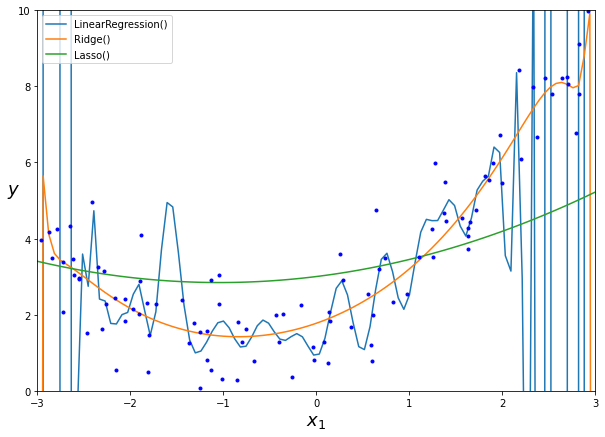

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# m = 100
# X = 6 * np.random.rand(m, 1) - 3
# y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

models = [LinearRegression(), Ridge(), Lasso()]

plt.figure(figsize=(10, 7))

for model in models:
    
    pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=300, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", model),
    ])
    
    pipeline.fit(X, y)
    y_newbig = pipeline.predict(X_new)
    plt.plot(X_new, y_newbig, label=str(model))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

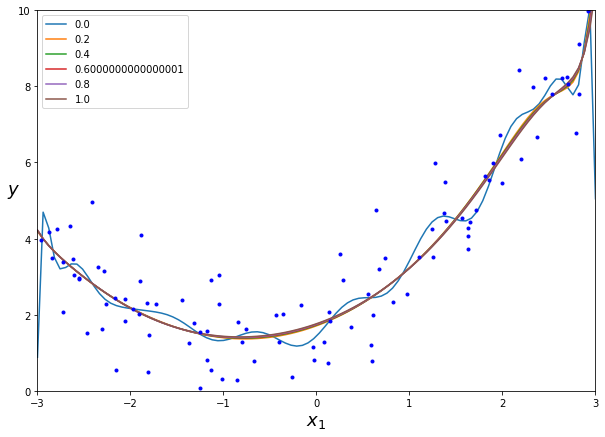

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# m = 100
# X = 6 * np.random.rand(m, 1) - 3
# y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

model = Ridge()
alphas = np.arange(0, 1.1, 0.2)

plt.figure(figsize=(10, 7))

for alpha in alphas:
    
    pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", Ridge(alpha=alpha)),
    ])
    
    pipeline.fit(X, y)
    y_newbig = pipeline.predict(X_new)
    plt.plot(X_new, y_newbig, label=str(alpha))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [11]:
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("regul_reg", Ridge(alpha=0.1)),
])

pipeline.fit(X, y)
pipeline['regul_reg'].coef_

array([[ 1.6666556 ,  1.66972022, -0.15263571, -0.0734534 ,  0.64184285,
         0.29500643,  0.38234634,  0.12517717, -0.28120113, -0.26061825,
        -0.73034934, -0.51380526, -0.76708343, -0.50737959, -0.41331591,
        -0.2421398 ,  0.24207041,  0.23010655,  1.10801478,  0.84465473]])

/Users/kamilpabijan/Documents/SDA/Learning_repo/venv_app/lib/python3.9/site-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/kamilpabijan/Documents/SDA/Learning_repo/venv_app/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/kamilpabijan/Documents/SDA/Learning_repo/venv_app/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.692e+01, tolerance: 5.269e-02 Linear regression models with null weight for the l1 regularization term are 

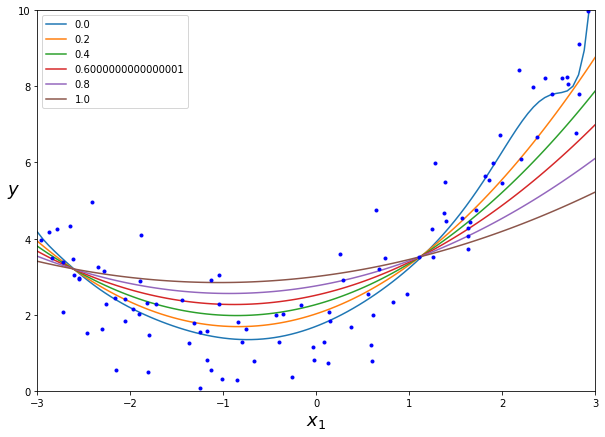

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# m = 100
# X = 6 * np.random.rand(m, 1) - 3
# y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

model = Ridge()
alphas = np.arange(0.0, 1.1, 0.2)

plt.figure(figsize=(10, 7))

for alpha in alphas:
    
    pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", Lasso(alpha=alpha)),
    ])
    
    pipeline.fit(X, y)
    # print(pipeline['regul_reg'].coef_)
    y_newbig = pipeline.predict(X_new)
    plt.plot(X_new, y_newbig, label=str(alpha))

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [13]:
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("regul_reg", Lasso(alpha=0.01)),
])

pipeline.fit(X, y)
pipeline['regul_reg'].coef_

array([ 1.70743749,  1.57304573,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.09296283, -0.07988566, -0.        ,
       -0.00377144, -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ])